<a href="https://colab.research.google.com/github/MarioSigal/Procesamiento-de-Imagenes/blob/main/Laboratorios/Laboratorio6_Pdi2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 6: Color**

❗❗❗❗ ***Recuerden subir la carpeta `imagenes` antes de correr el codigo. Las imagenes se encuentran en la entrega*** ❗❗❗❗

Hasta ahora, solo hemos trabajado con imágenes en blanco y negro, nos importaban solo los valores de iluminación de la imagen. Aunque esta información ya nos da cierta idea para analizar, podemos ganar contexto si tomamos en cuenta la información de color en las imágenes.

Usualmente, las imágenes digitales están en el plano **RGB**, simulando la forma en la que ve el ojo humano usando la escala de intensidad de luz **Roja**, **Verde** y **Azul**. Aunque esta manera simula cómo vemos los colores, no es una buena representación de cómo los entendemos o hablamos sobre ellos.

Al hablar de colores, naturalmente los caracterizamos en tres categorías:

- **Iluminación**: Si es oscuro o claro.  
- **Tono (Hue)**: El color principal (violeta, celeste, naranja, etc.).  
- **Saturación**: La fuerza o pureza del color.

Es más normal escuchar una descripción como:  
> *“Un naranja fuerte y oscuro”*

que decir:  

> *“Muy rojo, un poquito verde y más o menos azul.”*

Por esta razón, muchos programas de procesamiento de imágenes trabajan con el espacio de color **HSV** (*Hue, Saturation, Value*), que separa la información de color de una imagen de manera más cercana a cómo los humanos la percibimos.

## **Pérdida de Información al Pasaje a Gris**

Al pasar de 3 canales de información a 1, es necesario que perdamos información. Es por esto que al pasar una imagen a color a escala de grises, podríamos ignorar diferencias importantes entre secciones de la imagen.

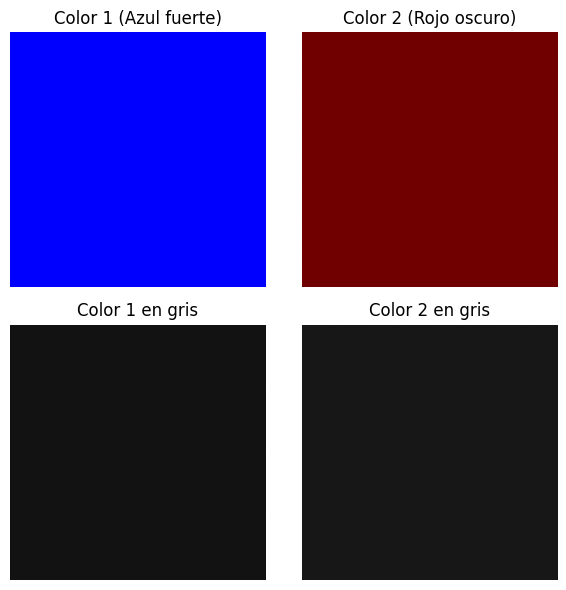

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Creo dos bloques de color
color1 = np.ones((100, 100, 3), dtype=np.float32)
color2 = np.ones((100, 100, 3), dtype=np.float32)

# Asignar colores normalizados (0 a 1)
color1[:] = [0, 0, 1]         # Azul fuerte
color2[:] = [112/255, 0, 0]   # Rojo oscuro

# Convertir a escala de grises
gray1 = rgb2gray(color1)
gray2 = rgb2gray(color2)

# Mostrar resultados
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

axs[0, 0].imshow(color1, clim=(0,1))
axs[0, 0].set_title("Color 1 (Azul fuerte)")
axs[0, 0].axis('off')

axs[0, 1].imshow(color2, clim=(0,1))
axs[0, 1].set_title("Color 2 (Rojo oscuro)")
axs[0, 1].axis('off')

axs[1, 0].imshow(gray1, cmap='gray', clim=(0,1))
axs[1, 0].set_title("Color 1 en gris")
axs[1, 0].axis('off')

axs[1, 1].imshow(gray2, cmap='gray', clim=(0,1))
axs[1, 1].set_title("Color 2 en gris")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

## **Imagenes de color RGB**
Las imagenes digitales a color estaran compuestas por 3 dimensiones, cada una representando un canal diferente de color. Podemos tratar cada canal por separado y conseguir la distribucion de cada uno.

In [2]:
def pltImagenConH(imagen, imagenH, nombre, color, axs, columna):

  dicNombreColorMatplotlib = {
    "Rojo": "red",
    "Verde": "green",
    "Azul": "blue",
    "Gris": "black"
  }

  dicNombreColorMap = {
    "Rojo": "Reds_r",
    "Verde": "Greens_r",
    "Azul": "Blues_r",
    "Gris": None
  }

  axs[0][columna].set_title(f"Imagen {nombre}")
  axs[0][columna].axis("off")
  axs[0][columna].imshow(imagen, cmap=dicNombreColorMap[color], clim=(0,1))

  axs[1][columna].set_title(f"Histograma {color}")
  axs[1][columna].grid(True)
  axs[1][columna].hist(imagenH.ravel(), bins=256, color=dicNombreColorMatplotlib[color])



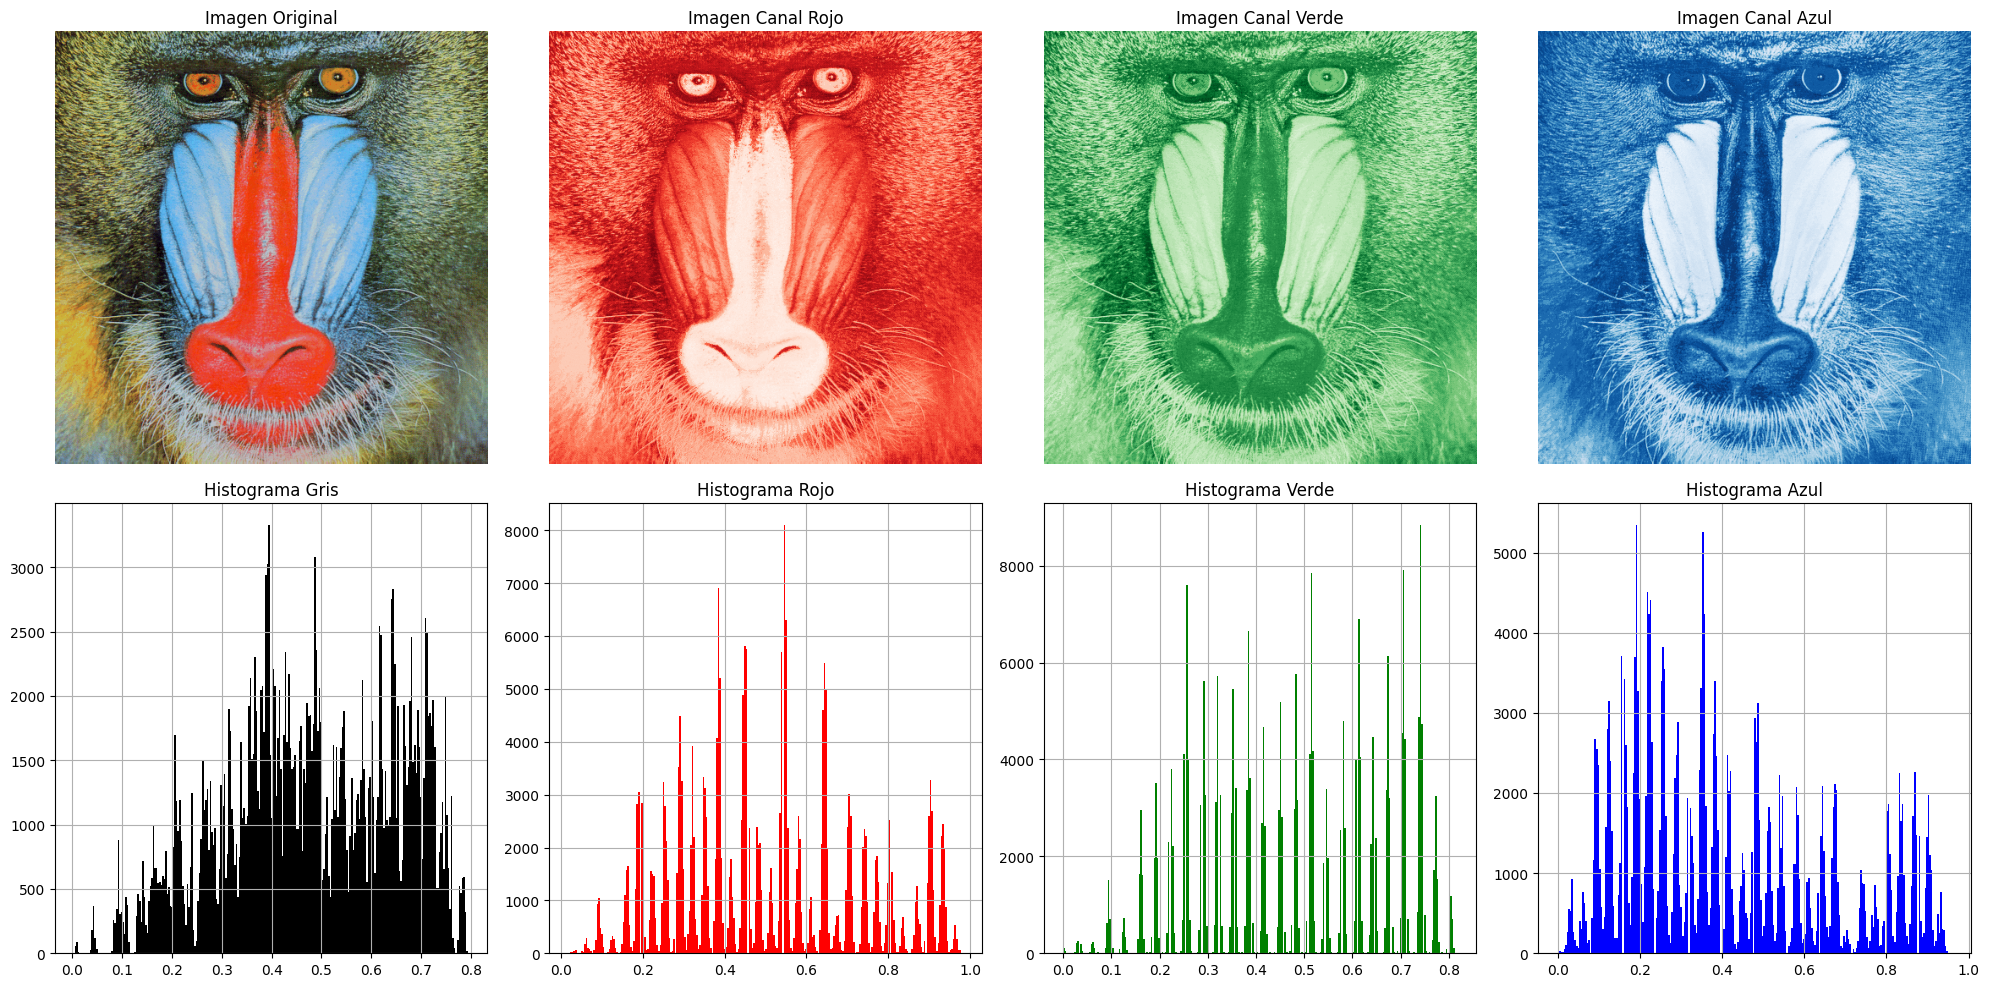

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, util, color

# Para imagenes de Color, tambien podemos usar indexacion para separar los multiples canales
# Por default, los canales de colores estaran en la ultima dimension del arreglo
# En caso de RGB, el canal Rojo tendra index 0, el Verde 1 y Azul 2.

# Cargamos una imagen a Color
imagenRGB = util.img_as_float64(io.imread("/content/Imagenes/mandril_color.tif"))

# Canal Rojo
imagenRojo = imagenRGB[:,:,0]

# Canal Verde
imagenVerde = imagenRGB[:,:,1]

# Canal Azul
imagenAzul = imagenRGB[:,:,2]

fig, axs = plt.subplots(2,4, figsize=(20,10))

pltImagenConH(imagenRGB, rgb2gray(imagenRGB), "Original", "Gris", axs, 0)
pltImagenConH(imagenRojo, imagenRojo, "Canal Rojo", "Rojo", axs, 1)
pltImagenConH(imagenVerde, imagenVerde, "Canal Verde", "Verde", axs, 2)
pltImagenConH(imagenAzul, imagenAzul, "Canal Azul", "Azul", axs, 3)

plt.tight_layout()
plt.show()

## **Imagenes de color HSV**
Para pasar de una imagen RGB a HSV, usaremos la funcion `rgb2hsv` y para reconvertirlas a RGB `hsv2rgb`



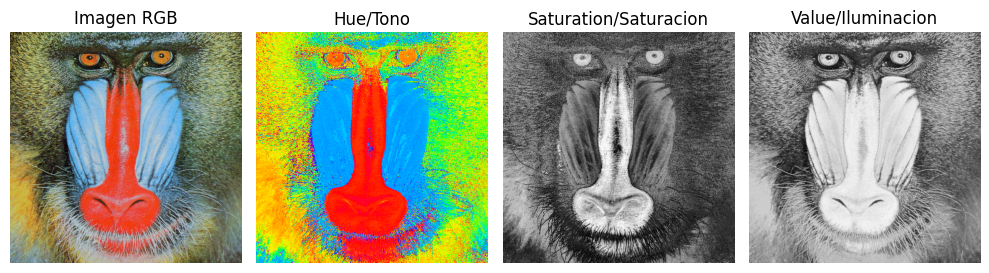

In [7]:
imagenRGB = util.img_as_float64(io.imread("/content/Imagenes/mandril_color.tif"))

imageHSV = color.rgb2hsv(imagenRGB)

# Todos los canales van de 0 a 1

# Canal 0 = Hue
imagenHue = imageHSV[:,:,0]

# Canal 1 = Saturation
imagenSat = imageHSV[:,:,1]

# Canal 2 = Value
imagenVal = imageHSV[:,:,2]

fig, axes = plt.subplots(1, 4, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(imagenRGB, clim=(0,1))
ax[0].set_title(f"Imagen RGB")
ax[0].axis("off")

ax[1].imshow(imagenHue, cmap='hsv', clim=(0,1))
ax[1].set_title(f"Hue/Tono")
ax[1].axis("off")

ax[2].imshow(imagenSat, cmap='gray', clim=(0,1))
ax[2].set_title(f"Saturation/Saturacion")
ax[2].axis("off")


ax[3].imshow(imagenVal, cmap='gray', clim=(0,1))
ax[3].set_title(f"Value/Iluminacion")
ax[3].axis("off")



plt.tight_layout()
plt.show()

## ***Ejercicio***: Realce de Saturacion
Dada una imagen y una constante c, aumentar su saturacion convirtiendola en HSV, multiplicar cada pixel en el plano de la saturacion por c y reconvertirla a RGB. Ver que cuando c > 1, esto aumenta la intensidad aparente y con c < 1 la reduce.

*RECORDAR QUE AL RECONVERTIR, LOS VALORES DEBEN SER VALIDOS.*

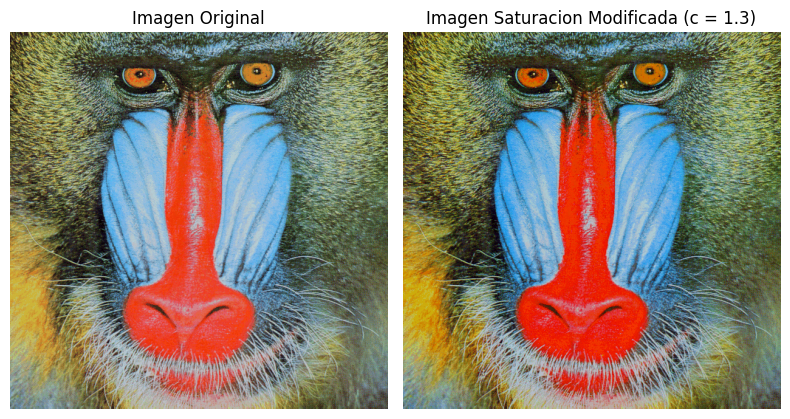

In [11]:
def modificarSat(imagen, c):
  imagenHSV = color.rgb2hsv(imagen)

  #COMPLETAR
  imagenHue, imagenSat, imagenVal = imageHSV[:,:,0], imageHSV[:,:,1], imageHSV[:,:,2]
  imagenSat = imagenSat * c
  imagenSat = np.clip(imagenSat, 0, 1)
  imagenHSV = np.dstack((imagenHue, imagenSat, imagenVal))
  imagenRGB = color.hsv2rgb(imagenHSV)
  return imagenRGB

CONS = 1.3

imagenRGB = util.img_as_float64(io.imread("/content/Imagenes/mandril_color.tif"))
imagenRealce = modificarSat(imagenRGB, CONS)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(imagenRGB, clim=(0,1))
ax[0].set_title(f"Imagen Original")
ax[0].axis("off")

ax[1].imshow(imagenRealce, clim=(0,1))
ax[1].set_title(f"Imagen Saturacion Modificada (c = {CONS})")
ax[1].axis("off")

plt.tight_layout()
plt.show()

## ***Ejercicio***: Alteracion de Hue (cambio de tono)

Dada una imagen y una constante c, cambiar el tono de la imagen convirtiendola en HSV, Sumar cada pixel en el plano de Hue por c y reconvertirla a RGB. Ver el efecto en los colores cuando c es muy chico yque sucede cuando c es muy grande.

**Ayuda**: *Recordar que el tono representa un angulo en la **rueda de color**, donde 0 = 0 y 1 = 2π. Si al sumar una constante el valor es mayor a 1, el angulo deberia **dar la vuelta** como las manijas de un reloj. Lo mismo si c es negativo.*

Por ejemplo, si c fuera 0.5, es decir sumar el angulo π, la transformacion tendria la forma:

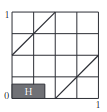

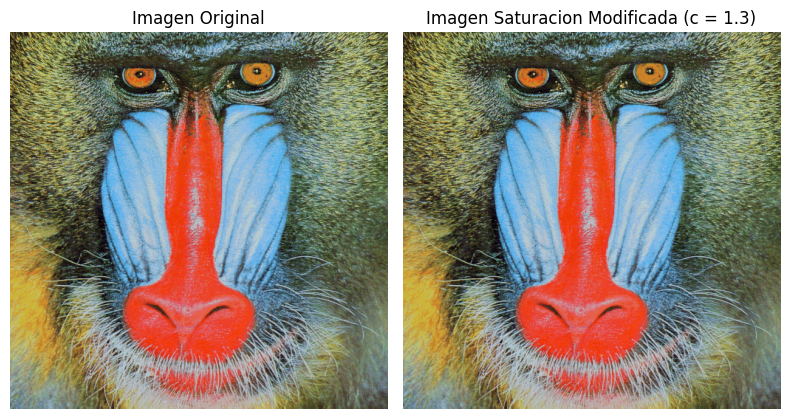

In [ ]:
def cambioDeTono(imagen, c):
  imagenHSV = color.rgb2hsv(imagen)
  #COMPLETAR
  return color.hsv2rgb(imagenHSV)
CONS = 1.3

imagenRGB = util.img_as_float64(io.imread("/content/Imagenes/mandril_color.tif"))
imagenRealce = cambioDeTono(imagenRGB, CONS)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(imagenRGB, clim=(0,1))
ax[0].set_title(f"Imagen Original")
ax[0].axis("off")

ax[1].imshow(imagenRealce, clim=(0,1))
ax[1].set_title(f"Imagen Saturacion Modificada (c = {CONS})")
ax[1].axis("off")

plt.tight_layout()
plt.show()

## ***CHEKPOINT 1 !!!!***

## ***Ejercicio***: Ecualizacion De Iluminacion
Dada una imagen, realizar una ecualizacion del histograma sobre su calan de Value/Iluminacion y luego reconvertirla a RGB. Compararlo con aplicar ecualizacion sobre los tres canales.

Utilizar la funcion `exposure.equalize_hist(img)`




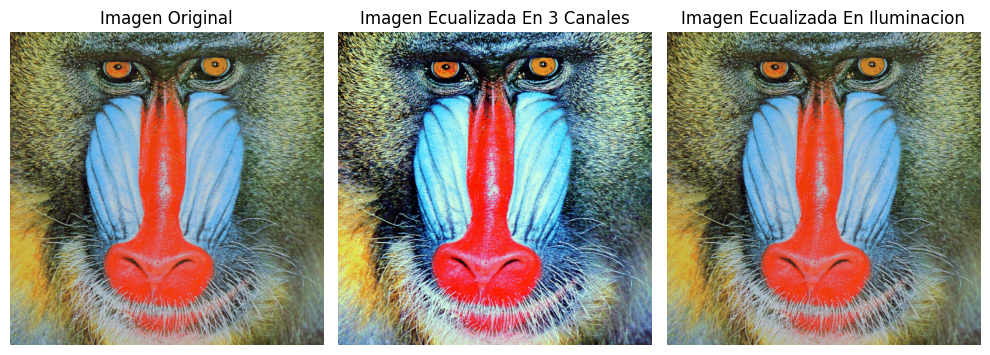

In [ ]:
from skimage import exposure

def ecualizacion3Canales(imagen):
  imgR = exposure.equalize_hist(imagen[:,:,0])
  imgG = exposure.equalize_hist(imagen[:,:,1])
  imgB = exposure.equalize_hist(imagen[:,:,2])

  imgEcualizada = imagen.copy()

  imgEcualizada[:,:,0] = imgR
  imgEcualizada[:,:,1] = imgG
  imgEcualizada[:,:,2] = imgB

  return imgEcualizada

def ecualizacionDeVal(imagen):
  imagenHSV = color.rgb2hsv(imagen)
  #COMPLETAR
  return color.hsv2rgb(imagenHSV)

imagenRGB = util.img_as_float64(io.imread("/content/Imagenes/mandril_color.tif"))
imagenEcualizada3C = ecualizacion3Canales(imagenRGB)
imagenEcualizadaIlum = ecualizacionDeVal(imagenRGB)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(imagenRGB, clim=(0,1))
ax[0].set_title(f"Imagen Original")
ax[0].axis("off")

ax[1].imshow(imagenEcualizada3C, clim=(0,1))
ax[1].set_title(f"Imagen Ecualizada En 3 Canales")
ax[1].axis("off")

ax[2].imshow(imagenEcualizadaIlum, clim=(0,1))
ax[2].set_title(f"Imagen Ecualizada En Iluminacion")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## ***CHEKPOINT FINAL !!!!***